In [1]:
import os
os.chdir('/home/jaentrouble/hrnet_pretrain')
print(os.getcwd())

/home/jaentrouble/hrnet_pretrain


In [2]:
%matplotlib inline

In [10]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
Unpacking objects:  50% (2/4)remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), 558.67 KiB | 693.00 KiB/s, done.
From https://github.com/jaentrouble/hrnet_pretrain
   9c3420c..5fac552  master     -> origin/master
Updating 9c3420c..5fac552
Fast-forward
 check_dataset.ipynb | 68 +++++++++++++++++++++++++++++++++++++++++++++++++----
 model_trainer.py    |  2 +-
 2 files changed, 64 insertions(+), 6 deletions(-)


In [11]:
from model_trainer import create_train_dataset

In [12]:
img_dir = '/home/jaentrouble/data/imagenet/train'
img_names = os.listdir(img_dir)

In [13]:
import json

In [14]:
with open('meta.json','r') as f:
    label_dict=json.load(f)

In [15]:
with open('id_to_name.json','r') as f:
    names = json.load(f)

In [16]:
img_size = (240,320)
ds = create_train_dataset(
    img_dir,
    img_names,
    label_dict,
    img_size,
    32,
    buffer_size=1000,
)

In [17]:
sample = ds.take(5).as_numpy_iterator()

In [18]:
import matplotlib.pyplot as plt

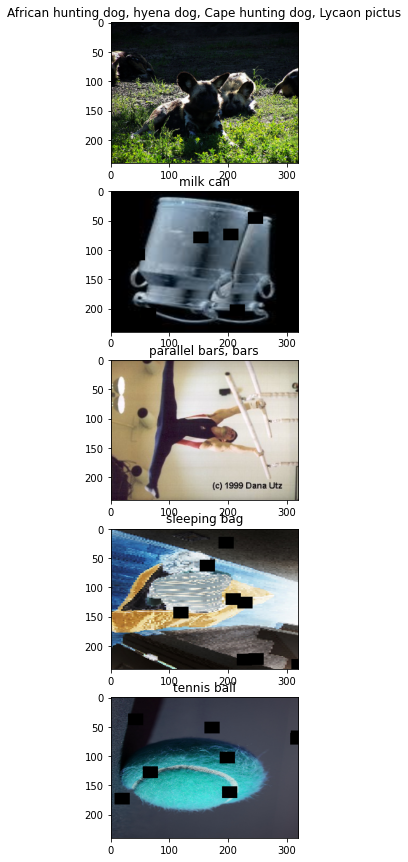

In [19]:
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(names[s[1][0]])
plt.show()

In [20]:
with open('val_label.json','r') as f:
    val_label = json.load(f)

In [21]:
from model_trainer import imagenet_val_dataset
val_dir = '/home/jaentrouble/data/imagenet/valid'
val_ds = imagenet_val_dataset(val_dir, val_label, img_size, 32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


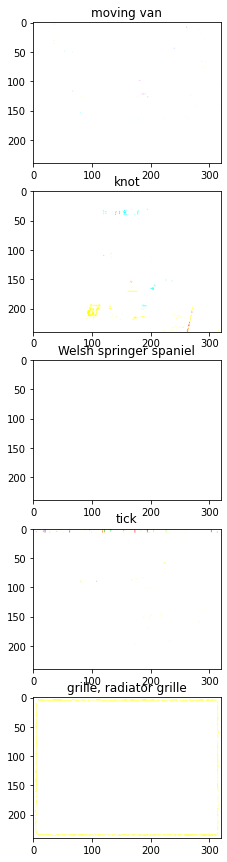

In [22]:
sample = val_ds.take(5).as_numpy_iterator()
fig = plt.figure(figsize=(15,15))
for i, s in enumerate(sample):
    ax = fig.add_subplot(5,1,i+1)
    img = s[0][0]
    ax.imshow(img)
    ax.title.set_text(names[s[1][0]])
plt.show()

In [24]:
print(s[0][0])

[[[245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]
  ...
  [245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]]

 [[245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]
  ...
  [245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]]

 [[245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]
  ...
  [245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]]

 ...

 [[245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]
  ...
  [245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]]

 [[245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]
  ...
  [245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]]

 [[245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]
  ...
  [245. 223.   2.]
  [245. 223.   2.]
  [245. 223.   2.]]]
